In [56]:
import json
import pandas as pd
import re

In [55]:
with open("transcript_analysis_sections_80.json") as f:
    data = json.load(f)

In [71]:
def flatten(l):
    return l[0] if isinstance(l, list) and len(l) == 1 and isinstance(l[0], list) else l

flat_rows = []

for transcript in data:
    tid = transcript["transcript_id"]
    month = transcript["month"]
    location = transcript["location"]
    organization = transcript["organization"]
    education = transcript["education"]
    date = transcript["date"]
    for section in transcript["sections"]:
        agent_emotions = flatten(section.get("speaker emotion", []))
        prospect_emotions = flatten(section.get("prospect emotion", []))
        row = {
            "transcript_id": tid,
            "month": month,
            "location": ", ".join(map(str, location)),
            "education": ", ".join(map(str, education)),
            "organization": ", ".join(map(str, organization)),
            "date": ", ".join(map(str, date)),
            "phase": section.get("phase"),
            "agent_emotions": ", ".join(agent_emotions),
            "agent_emotion_scores": ", ".join(map(str, section.get("speaker emotion_score", []))),
            "agent_keywords": section.get("speaker keywords"),
            "agent_duration": section.get("speaker duration"),
            "prospect_emotions": ", ".join(prospect_emotions),
            "prospect_emotion_scores": ", ".join(map(str, section.get("prospect emotion_score", []))),
            "prospect_keywords": section.get("prospect keywords"),
            "prospect_duration": section.get("prospect duration"),
            "start_timestamp": section.get("start_timestamp"),
            "end_timestamp": section.get("end_timestamp")
        }
        flat_rows.append(row)
df = pd.DataFrame(flat_rows)

In [72]:
not_locations = ['Amruth', 'CR', 'Venmat', 'RC', 'cont', 'Clash', 'AB', 'Reddit', 'Hindi', 'M7', 'DILR', 'Nikbar']

def not_a_location(location):
    parts = [p.strip() for p in location.split(',')]
    cleaned = [p for p in parts if p not in not_locations]
    return ', '.join(cleaned)

df['location'] = df['location'].apply(not_a_location)
df['location'] = df['location'].apply(lambda x: 'No Info' if x == '' else x)
df['education'] = df['education'].apply(lambda x: 'No Info' if x == '' else x)
df['organization'] = df['organization'].apply(lambda x: 'No Info' if x == '' else x)
df['date'] = df['date'].apply(lambda x: 'No Info' if x == '' else x)

In [73]:
df['location'].value_counts()

location
No Info                                                   714
India                                                      63
Mumbai                                                     35
UK                                                         14
US                                                         14
Kanpur                                                      7
India, California                                           7
Delhi, Bangalore                                            7
India, Mumbai, Ahmedabad                                    7
Chhattisgarh, Gurgaon                                       7
Amruthai                                                    7
Ghaziabad                                                   7
Jaipur                                                      7
Hyderabad, Mumbai, US, Canada, Delhi, India                 7
Kalyan                                                      7
Bihar, Kerala, Orissa                                       7

In [74]:

df['agent_vs_prospect'] = df.apply(
    lambda row: row['agent_duration'] / row['prospect_duration']if row['prospect_duration'] != 0 else row['agent_duration'],axis=1
).apply(lambda x: f"{int(x)}:1")
df['agent_vs_prospect_num'] = df.apply(
    lambda row: int(row['agent_duration'] / row['prospect_duration']if row['prospect_duration'] != 0 else row['agent_duration']),axis=1
)
df

,transcript_id,month,location,education,organization,date,phase,agent_emotions,agent_emotion_scores,agent_keywords,agent_duration,prospect_emotions,prospect_emotion_scores,prospect_keywords,prospect_duration,start_timestamp,end_timestamp,agent_vs_prospect,agent_vs_prospect_num
0,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Introduction,"admiration, curiosity","0.7238321900367737, 0.9738934636116028","GMAT Club, India, GMAT, MAT, Correct, IIMA and...",21,"realization, neutral","0.8233293294906616, 0.944320559501648","Electronics and Communication, engineering in ...",21,00:00:02,00:04:02,1:1,1
1,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Prospect’s performance,"approval, curiosity","0.45934611558914185, 0.3165651857852936","GMAT, yeah, planner, mock, good, verbal, mocks...",107,neutral,0.9952186942100525,"Yeah, Calcutta, Richila Manit Akono, Manit Ako...",20,00:04:16,00:15:26,5:1,5
2,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Agent drawing up plan,neutral,0.9943735599517822,"questions, verbal, Stage, module, answer, quan...",161,"admiration, curiosity, optimism","0.9545533061027527, 0.48906055092811584, 0.862...","MAP, mock, mock test, giving the mock, attain ...",8,00:15:29,00:32:19,20:1,20
3,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Explaining product,realization,0.37970614433288574,"Stage, questions, cementing, quant, quizzes, h...",271,"approval, curiosity, optimism","0.4291311800479889, 0.6528215408325195, 0.8705...","yeah, concepts, quant, hours, verbal, achieve,...",25,00:32:24,01:00:46,10:1,10
4,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Price discussion,"caring, optimism, neutral","0.3881281316280365, 0.652935266494751, 0.33111...","month, extension, start, mock, month extension...",68,"approval, curiosity, optimism","0.40559321641921997, 0.9225806593894958, 0.902...","month, thing, test, round, yeah, discount, cor...",17,01:00:52,01:08:05,4:1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,9_20250106,Jan,Mumbai,engineering,GMAT,like 5 years,Agent drawing up plan,curiosity,0.8675777316093445,"step, study plan, verbal, plan, study, time, s...",102,approval,0.9975268244743347,"quals is fine, range, Yeah, strong point, fine...",3,00:05:45,00:11:46,34:1,34
990,9_20250106,Jan,Mumbai,engineering,GMAT,like 5 years,Explaining product,"admiration, realization","0.7185186743736267, 0.9421740174293518","Focus Edition, topic, announced in June, basic...",174,"approval, confusion, curiosity","0.444856733083725, 0.635599672794342, 0.596887...","remember sentence correction, sentence correct...",9,00:11:51,00:22:10,19:1,19
991,9_20250106,Jan,Mumbai,engineering,GMAT,like 5 years,Price discussion,neutral,0.9314547777175903,"front of instructor, enhanced experience, expe...",49,approval,0.894305408000946,"forward, start, correct, structure",3,00:22:11,00:25:17,16:1,16
992,9_20250106,Jan,Mumbai,engineering,GMAT,like 5 years,Q&A,neutral,0.9831719398498535,"live, live session, sessions, session, months ...",45,approval,0.9872320890426636,"Yeah, question, questions, months, coming, Per...",7,00:25:21,00:28:14,6:1,6


In [75]:
df['agent_vs_prospect_num'].value_counts()

agent_vs_prospect_num
2     133
1     114
3      99
4      94
5      78
     ... 
69      1
39      1
50      1
65      1
34      1
Name: count, Length: 76, dtype: int64

In [159]:
df['phase'].unique()

array(['Introduction', 'Prospect’s performance', 'Agent drawing up plan',
       'Explaining product', 'Price discussion', 'Q&A', 'Wrap'],
      dtype=object)

In [76]:
df.describe()

,agent_duration,prospect_duration,agent_vs_prospect_num
count,994.000000,994.000000,994.000000
mean,68.815895,11.241449,9.917505
std,60.733162,8.149167,15.976734
min,3.000000,0.000000,0.000000
25%,24.000000,6.000000,2.000000
50%,51.000000,9.000000,5.000000
75%,89.250000,15.000000,10.000000
max,366.000000,55.000000,197.000000


In [77]:
ratio_by_phase = df.groupby('phase')['agent_vs_prospect_num'].agg(
    min='min',
    max='max',
    mean='mean',
    median='median',
    std='std'
).reset_index()

ratio_by_phase

,phase,min,max,mean,median,std
0,Agent drawing up plan,1,110,15.161972,8.0,20.712362
1,Explaining product,3,197,19.302817,11.5,24.621097
2,Introduction,0,27,2.697183,1.0,4.358068
3,Price discussion,1,71,16.246479,8.0,17.961419
4,Prospect’s performance,1,20,4.901408,4.0,3.863467
5,Q&A,1,67,7.866197,5.0,10.274411
6,Wrap,0,41,3.246479,2.0,4.088015


In [78]:
df.to_csv("transcript_analysis_sections_80.csv", index=False)

In [79]:
def pivot_transcript_sections(transcript):
    tid = transcript["transcript_id"]
    flat = {
        "transcript_id": tid,
    }

    # Keys you want to flatten like "phase: value" per field
    fields_to_extract = [
        ("agent_emotions_with_score", lambda s: ", ".join(
            f"{emo} - {round(float(score), 2)}"
            for emo, score in zip(
                flatten(s.get("speaker emotion", [])),
                flatten(s.get("speaker emotion_score", []))
            )
        )),
        ("agent_duration", lambda s: str(s.get("speaker duration", ""))),
        ("agent_keywords", lambda s: s.get("speaker keywords", "")),
        ("prospect_emotions_with_score", lambda s: ", ".join(
            f"{emo} - {round(float(score), 2)}"
            for emo, score in zip(
                flatten(s.get("prospect emotion", [])),
                flatten(s.get("prospect emotion_score", []))
            )
        )),
        ("prospect_duration", lambda s: str(s.get("prospect duration", ""))),
        ("prospect_keywords", lambda s: s.get("prospect keywords", "")),
        ("start_end_time", lambda s: f"{s.get('start_timestamp')} - {s.get('end_timestamp')}"),
        ("agent_vs_prospect_num", lambda s: (
            int(s.get('speaker duration', 0) / s.get('prospect duration', 1))
            if s.get('prospect duration', 1) != 0 else s.get('speaker duration', 0)
        ))
    ]

    # Process each field
    for new_col_name, extractor in fields_to_extract:
        lines = []
        for section in transcript["sections"]:
            phase = section.get("phase", "Unknown")
            val = extractor(section)
            lines.append(f"{phase}: {val}")
        flat[new_col_name] = "\n".join(lines)

    return flat


In [80]:
summary_df = pd.DataFrame([pivot_transcript_sections(t) for t in data])
summary_df

,transcript_id,agent_emotions_with_score,agent_duration,agent_keywords,prospect_emotions_with_score,prospect_duration,prospect_keywords,start_end_time,agent_vs_prospect_num
0,100_20250213,"Introduction: admiration - 0.72, curiosity - 0...",Introduction: 21\nProspect’s performance: 107\...,"Introduction: GMAT Club, India, GMAT, MAT, Cor...","Introduction: realization - 0.82, neutral - 0....",Introduction: 21\nProspect’s performance: 20\n...,"Introduction: Electronics and Communication, e...",Introduction: 00:00:02 - 00:04:02\nProspect’s ...,Introduction: 1\nProspect’s performance: 5\nAg...
1,101_20250212,Introduction: admiration - 1.0\nProspect’s per...,Introduction: 22\nProspect’s performance: 93\n...,"Introduction: plans with GMAT, GMAT, Awesome, ...",Introduction: desire - 0.8\nProspect’s perform...,Introduction: 20\nProspect’s performance: 31\n...,"Introduction: engineer by profession, basicall...",Introduction: 00:00:02 - 00:02:39\nProspect’s ...,Introduction: 1\nProspect’s performance: 3\nAg...
2,102_20250212,Introduction: curiosity - 0.99\nProspect’s per...,Introduction: 18\nProspect’s performance: 83\n...,"Introduction: mute, scores, test, remember, sc...","Introduction: approval - 0.69, realization - 0...",Introduction: 19\nProspect’s performance: 27\n...,"Introduction: Yeah, quant, quant part, easy, m...",Introduction: 00:00:04 - 00:02:39\nProspect’s ...,Introduction: 0\nProspect’s performance: 3\nAg...
3,103_20250212,Introduction: approval - 0.99\nProspect’s perf...,Introduction: 17\nProspect’s performance: 94\n...,"Introduction: clients outside Rome, Rome, Ital...","Introduction: desire - 0.85, optimism - 0.39, ...",Introduction: 21\nProspect’s performance: 21\n...,"Introduction: corporate finance, teaching corp...",Introduction: 00:00:03 - 00:03:32\nProspect’s ...,Introduction: 0\nProspect’s performance: 4\nAg...
4,104_20250212,"Introduction: curiosity - 0.83, neutral - 0.87...",Introduction: 7\nProspect’s performance: 29\nA...,"Introduction: chance to watch, watch the video...","Introduction: curiosity - 0.92, optimism - 0.3...",Introduction: 5\nProspect’s performance: 7\nAg...,"Introduction: Amruth, Yeah, laptop, business l...",Introduction: 00:00:05 - 00:01:48\nProspect’s ...,Introduction: 1\nProspect’s performance: 4\nAg...
...,...,...,...,...,...,...,...,...,...
137,96_20250211,"Introduction: admiration - 0.99, optimism - 0....",Introduction: 34\nProspect’s performance: 98\n...,"Introduction: start, Chicago Booth, prep, GMAT...","Introduction: approval - 0.37, neutral - 0.89\...",Introduction: 3\nProspect’s performance: 13\nA...,"Introduction: early August, August, test date,...",Introduction: 00:00:02 - 00:02:26\nProspect’s ...,Introduction: 11\nProspect’s performance: 7\nA...
138,97_20250212,"Introduction: admiration - 0.9, curiosity - 0....",Introduction: 21\nProspect’s performance: 84\n...,"Introduction: fresh attempt, June, months, goo...","Introduction: approval - 0.47, realization - 0...",Introduction: 20\nProspect’s performance: 39\n...,"Introduction: CAT and Zat, CAT, Zat, preparing...",Introduction: 00:00:03 - 00:03:48\nProspect’s ...,Introduction: 1\nProspect’s performance: 2\nAg...
139,98_20250212,"Introduction: approval - 0.99, curiosity - 0.3...",Introduction: 14\nProspect’s performance: 42\n...,"Introduction: primary goal, top goal, goal, po...","Introduction: admiration - 0.81, approval - 0....",Introduction: 3\nProspect’s performance: 9\nAg...,"Introduction: open to depending, score, year w...",Introduction: 00:00:02 - 00:00:58\nProspect’s ...,Introduction: 4\nProspect’s performance: 4\nAg...
140,99_20250211,Introduction: remorse - 0.39\nProspect’s perfo...,Introduction: 12\nProspect’s performance: 42\n...,"Introduction: Yeah, worries, thing, blank, bad...","Introduction: disappointment - 0.37, remorse -...",Introduction: 9\nProspect’s performance: 20\nA...,"Introduction: Yeah, Sir, MBA, working, GMAT, c...",Introduction: 00:00:02 - 00:00:42\nProspect’s ...,Introduction: 1\nProspect’s performa

## Hypothesis creation

In [81]:
H1_PROSPECT_POSITIVE = {"approval", "optimism", "realization", "hope", "confidence", "understanding", "exciting", "gratitude", "joy"}
H2_PROSPECT_POSITIVE = {"curiosity", "optimism", "realization", "desire"}
H2_PROSPECT_NEGATIVE = {"awkward", "confusion", "stress", "neutral", "anger", "disappointment"}
H3_AGENT_POSITIVE_FINAL = {"confidence", "relief", "admiration", "optimism"}
H4_AGENT_POSITIVE_EXPLAIN = {"realization", "optimism"}

In [82]:
PHASE_THRESHOLDS = {
    "Agent drawing up plan": 15.16,
    "Explaining product": 19.3,
    "Prospect’s performance": 4.9,
    "Q&A": 7.8,
    "Wrap": 3.2
}

In [182]:
def parse_list_column(col):
    if isinstance(col, list):
        return col  # Already parsed
    if isinstance(col, str):
        return col.strip("[]").replace("'", "").split(", ")
    return []

df["agent_emotions"] = df["agent_emotions"].apply(parse_list_column)
df["prospect_emotions"] = df["prospect_emotions"].apply(parse_list_column)

def calculate_conversion_likelihood(group):
    score = 0
    reasons = []
    key_phases = []
    emotions_detected = []
    prospect_keywords = []

    wrap_section = group[group["phase"].isin(["Q&A", "Wrap"])]
    price_section = group[group["phase"] == "Price discussion"]
    prospect_performance_section = group[group["phase"] == "Prospect’s performance"]
    explanation_section = group[group["phase"].isin(["Agent drawing up plan", "Explaining product", "Price discussion"])]

    # Hypothesis 1 Prospect's positive emotions in "Q&A" and "Wrap" phase
    h1_score = sum(1 for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)
    if h1_score > 1:
        score += 1
        reasons.append("Prospect showed positive emotions (more than 2) during wrap-up/Q&A")
        key_phases.extend(wrap_section["phase"].unique())
        emotions_detected.extend(e for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)
    elif h1_score > 0:
        score += 0.5
        reasons.append("Prospect showed positive emotion (hope or confidence or etc.) during wrap-up/Q&A")
        key_phases.extend(wrap_section["phase"].unique())
        emotions_detected.extend(e for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)

    # Hypothesis 2 Prospect's Strong will in "Prospect’s performance" phase and low stress/confusion in "Price discussion" phase
    h2_score1 = sum(1 for e_list in price_section["prospect_emotions"] for e in e_list if e in H2_PROSPECT_NEGATIVE)
    h2_score2 = sum(1 for e_list in prospect_performance_section["prospect_emotions"] for e in e_list if e in H2_PROSPECT_POSITIVE)
    if h2_score1 == 0 and h2_score2 > 0:
        score += 1
        reasons.append("Prospect showed willingness and curiosity in performance/targets discussions and Low stress or confusion during price discussion")
        key_phases.append("Price discussion")
    if h2_score1 == 0 or h2_score2 > 0:
        score += 0.5
        reasons.append("Either prospect showed willingness and curiosity in performance/targets discussions or they had Low stress or confusion during price discussion")
        if h2_score1 == 0:
            key_phases.append("Price discussion")
        else:
            key_phases.append("Prospect’s performance")

    # Hypothesis 3 Agent’s confidence at the "Q&A" and "Wrap" phase
    h3_score = sum(1 for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE_FINAL)
    if h3_score > 1:
        score += 1
        reasons.append("Agent maintained high confidence or relief near end")
        emotions_detected.extend(e for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE_FINAL)
    elif h3_score > 0:
        score += 0.5
        reasons.append("Agent maintained confidence or relief near end")
        emotions_detected.extend(e for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE_FINAL)

    # Hypothesis 4 Agent’s explainability,delivery and understanding at the "Agent drawing up plan", "Explaining product", and "Price discussion" phase
    h4_score = sum(1 for e_list in explanation_section["agent_emotions"] for e in e_list if e in H4_AGENT_POSITIVE_EXPLAIN)
    if h4_score > 0:
        score += 1
        reasons.append("Agent catered to the prospect needs with clarity during product explanation")
        key_phases.extend(explanation_section["phase"].unique())
        emotions_detected.extend(e for e_list in explanation_section["agent_emotions"] for e in e_list if e in H4_AGENT_POSITIVE_EXPLAIN)
        
    # Hypothesis 5: Ratios in specific phases
    agent_phases = ["Agent drawing up plan", "Explaining product"]
    prospect_phases = ["Prospect’s performance", "Q&A", "Wrap"]

    agent_dom = 0
    for phase in agent_phases:
        threshold = PHASE_THRESHOLDS[phase]
        match = group[
            (group["phase"] == phase) & 
            (group["agent_vs_prospect_num"] > threshold)
        ]
        if not match.empty:
            agent_dom += 1

    prospect_dom = 0
    for phase in prospect_phases:
        threshold = PHASE_THRESHOLDS[phase]
        match = group[
            (group["phase"] == phase) & 
            (group["agent_vs_prospect_num"] < 1 / threshold)
        ]
        if not match.empty:
            prospect_dom += 1

    if agent_dom >= 1 and prospect_dom >= 1:
        score += 1
        reasons.append("Agent invested justifiable time in product explanation phases, and prospect's engagement in Q&A/performance discussion was more")
    

    likelihood = round(score / 5, 2)
    prospect_keywords = ", ".join(group["prospect_keywords"].unique().tolist())

    return pd.Series({
        "transcript_id": group["transcript_id"].iloc[0],
        "month": group["month"].iloc[0],
        "conversion_likelihood": likelihood,
        "reasoning": ", ".join(map(str,reasons)),
        "key_phases": ",".join(map(str,key_phases)),
        "prospect_keywords": prospect_keywords,
        "emotions_detected": ",".join(map(str,emotions_detected)),
        "location": group["location"].iloc[0],
        "education": group["education"].iloc[0],
        "organization": group["organization"].iloc[0],
        "date": group["date"].iloc[0],
    })


## Conversion Likelihood

In [183]:
df_conversion = df.groupby("transcript_id").apply(calculate_conversion_likelihood).reset_index(drop=True)

C:\Users\yaamini\AppData\Local\Temp\ipykernel_21404\4071804513.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_conversion = df.groupby("transcript_id").apply(calculate_conversion_likelihood).reset_index(drop=True)


In [184]:
def clean_columns(df):
    return df.map(lambda x: 'No Info' if x == '' else x)

df_conversion = clean_columns(df_conversion)
df_conversion

,transcript_id,month,conversion_likelihood,reasoning,key_phases,prospect_keywords,emotions_detected,location,education,organization,date
0,100_20250213,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion,Agent drawing up pla...","Electronics and Communication, engineering in ...","approval,gratitude,optimism,admiration,optimis...",India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months"
1,101_20250212,Feb,0.8,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Price discussion,Price discussion,Age...","engineer by profession, basically an engineer,...","gratitude,optimism,optimism,optimism,realizati...",No Info,"engineering, masters","PMS, GMAC, CFA L1",about 1 1/2 years
2,102_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Prospect’s performance,Agent drawing ...","Yeah, quant, quant part, easy, ma'am, minute, ...","optimism,realization,approval,gratitude,admira...",No Info,No Info,GMAT,515515
3,103_20250212,Feb,0.5,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Prospect’s performance,Agent drawing ...","corporate finance, teaching corporate finance,...","gratitude,optimism,optimism","Milan, Rome, US",No Info,"Business School, GMAT, G Mac, IELTS",1 five days ago
4,104_20250212,Feb,0.6,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","Amruth, Yeah, laptop, business laptop, class, ...","approval,gratitude,gratitude,optimism",No Info,No Info,WhatsApp,No Info
...,...,...,...,...,...,...,...,...,...,...,...
137,96_20250211,Feb,0.4,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","early August, August, test date, date in mind,...","approval,approval,optimism",No Info,No Info,GMAT,No Info
138,97_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion,Price discussion","CAT and Zat, CAT, Zat, preparing for CAT, frac...","gratitude,gratitude,optimism,admiration",No Info,"science, bachelor, computer science","CAT, CAD, XLRI, GMAT","2024 May, 5 months"
139,98_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion,Agent drawing up pla...","open to depending, score, year work experience...","approval,gratitude,admiration,optimism,optimis...",No Info,No Info,No Info,No Info
140,99_20250211,Feb,0.4,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","Yeah, Sir, MBA, working, GMAT, camera, exam, g...","approval,gratitude,admiration",No Info,No Info,No Info,No Info


In [185]:
df_conversion.describe()

,conversion_likelihood
count,142.000000
mean,0.552113
std,0.171236
min,0.100000
25%,0.400000
50%,0.500000
75%,0.700000
max,0.900000


In [186]:
df_conversion.to_csv("conversion_likelihood_80.csv", index=False)

## Combined Dataset

In [187]:
combined_df = pd.merge(df_conversion, summary_df, on='transcript_id', how='inner')
combined_df = combined_df.drop(['prospect_keywords_x','key_phases'], axis=1)
combined_df = combined_df.rename(columns={'prospect_keywords_y': 'prospect_keywords'})
combined_df

,transcript_id,month,conversion_likelihood,reasoning,emotions_detected,location,education,organization,date,agent_emotions_with_score,agent_duration,agent_keywords,prospect_emotions_with_score,prospect_duration,prospect_keywords,start_end_time,agent_vs_prospect_num
0,100_20250213,Feb,0.7,Prospect showed positive emotions (more than 2...,"approval,gratitude,optimism,admiration,optimis...",India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months","Introduction: admiration - 0.72, curiosity - 0...",Introduction: 21\nProspect’s performance: 107\...,"Introduction: GMAT Club, India, GMAT, MAT, Cor...","Introduction: realization - 0.82, neutral - 0....",Introduction: 21\nProspect’s performance: 20\n...,"Introduction: Electronics and Communication, e...",Introduction: 00:00:02 - 00:04:02\nProspect’s ...,Introduction: 1\nProspect’s performance: 5\nAg...
1,101_20250212,Feb,0.8,Prospect showed positive emotion (hope or conf...,"gratitude,optimism,optimism,optimism,realizati...",No Info,"engineering, masters","PMS, GMAC, CFA L1",about 1 1/2 years,Introduction: admiration - 1.0\nProspect’s per...,Introduction: 22\nProspect’s performance: 93\n...,"Introduction: plans with GMAT, GMAT, Awesome, ...",Introduction: desire - 0.8\nProspect’s perform...,Introduction: 20\nProspect’s performance: 31\n...,"Introduction: engineer by profession, basicall...",Introduction: 00:00:02 - 00:02:39\nProspect’s ...,Introduction: 1\nProspect’s performance: 3\nAg...
2,102_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"optimism,realization,approval,gratitude,admira...",No Info,No Info,GMAT,515515,Introduction: curiosity - 0.99\nProspect’s per...,Introduction: 18\nProspect’s performance: 83\n...,"Introduction: mute, scores, test, remember, sc...","Introduction: approval - 0.69, realization - 0...",Introduction: 19\nProspect’s performance: 27\n...,"Introduction: Yeah, quant, quant part, easy, m...",Introduction: 00:00:04 - 00:02:39\nProspect’s ...,Introduction: 0\nProspect’s performance: 3\nAg...
3,103_20250212,Feb,0.5,Prospect showed positive emotion (hope or conf...,"gratitude,optimism,optimism","Milan, Rome, US",No Info,"Business School, GMAT, G Mac, IELTS",1 five days ago,Introduction: approval - 0.99\nProspect’s perf...,Introduction: 17\nProspect’s performance: 94\n...,"Introduction: clients outside Rome, Rome, Ital...","Introduction: desire - 0.85, optimism - 0.39, ...",Introduction: 21\nProspect’s performance: 21\n...,"Introduction: corporate finance, teaching corp...",Introduction: 00:00:03 - 00:03:32\nProspect’s ...,Introduction: 0\nProspect’s performance: 4\nAg...
4,104_20250212,Feb,0.6,Prospect showed positive emotions (more than 2...,"approval,gratitude,gratitude,optimism",No Info,No Info,WhatsApp,No Info,"Introduction: curiosity - 0.83, neutral - 0.87...",Introduction: 7\nProspect’s performance: 29\nA...,"Introduction: chance to watch, watch the video...","Introduction: curiosity - 0.92, optimism - 0.3...",Introduction: 5\nProspect’s performance: 7\nAg...,"Introduction: Amruth, Yeah, laptop, business l...",Introduction: 00:00:05 - 00:01:48\nProspect’s ...,Introduction: 1\nProspect’s performance: 4\nAg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,96_20250211,Feb,0.4,Prospect showed positive emotions (more than 2...,"approval,approval,optimism",No Info,No Info,GMAT,No Info,"Introduction: admiration - 0.99, optimism - 0....",Introduction: 34\nProspect’s performance: 98\n...,"Introduction: start, Chicago Booth, prep, GMAT...","Introduction: approval - 0.37, neutral - 0.89\...",Introduction: 3\nProspect’s performance: 13\nA...,"Introduction: early August, August, test date,...",Introduction: 00:00:02 - 00:02:26\nProspect’s ...,Introduction: 11\nProspect’s performance: 7\nA...
138,97_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"gratitude,gratitude,optimism,admiration",No Info,"science, bachelor, computer science","CAT, CAD, XLR

In [188]:
combined_df.to_csv("combined_dataset_80.csv", index=False)

## Visualizations

In [189]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

### Transcript Sections Analysis

In [190]:
df_sec = pd.read_csv("transcript_analysis_sections_80.csv")
df_sec.head(8)

,transcript_id,month,location,education,organization,date,phase,agent_emotions,agent_emotion_scores,agent_keywords,agent_duration,prospect_emotions,prospect_emotion_scores,prospect_keywords,prospect_duration,start_timestamp,end_timestamp,agent_vs_prospect,agent_vs_prospect_num
0,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Introduction,"admiration, curiosity","0.7238321900367737, 0.9738934636116028","GMAT Club, India, GMAT, MAT, Correct, IIMA and...",21,"realization, neutral","0.8233293294906616, 0.944320559501648","Electronics and Communication, engineering in ...",21,00:00:02,00:04:02,1:1,1
1,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Prospect’s performance,"approval, curiosity","0.45934611558914185, 0.3165651857852936","GMAT, yeah, planner, mock, good, verbal, mocks...",107,neutral,0.9952186942100525,"Yeah, Calcutta, Richila Manit Akono, Manit Ako...",20,00:04:16,00:15:26,5:1,5
2,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Agent drawing up plan,neutral,0.9943735599517822,"questions, verbal, Stage, module, answer, quan...",161,"admiration, curiosity, optimism","0.9545533061027527, 0.48906055092811584, 0.862...","MAP, mock, mock test, giving the mock, attain ...",8,00:15:29,00:32:19,20:1,20
3,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Explaining product,realization,0.37970614433288574,"Stage, questions, cementing, quant, quizzes, h...",271,"approval, curiosity, optimism","0.4291311800479889, 0.6528215408325195, 0.8705...","yeah, concepts, quant, hours, verbal, achieve,...",25,00:32:24,01:00:46,10:1,10
4,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Price discussion,"caring, optimism, neutral","0.3881281316280365, 0.652935266494751, 0.33111...","month, extension, start, mock, month extension...",68,"approval, curiosity, optimism","0.40559321641921997, 0.9225806593894958, 0.902...","month, thing, test, round, yeah, discount, cor...",17,01:00:52,01:08:05,4:1,4
5,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Q&A,approval,0.9780182242393494,"Yeah, good, profile, round, correct, cutoff fo...",56,"approval, curiosity","0.38335686922073364, 0.5217686295509338","IIMA and IIMC, year MBA, Yeah, MBA, good, Indi...",29,01:08:12,01:14:54,1:1,1
6,100_20250213,Feb,India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months",Wrap,"admiration, approval, optimism","0.7448238134384155, 0.9380417466163635, 0.8102...","admission consultants, professional consultant...",26,"admiration, gratitude, optimism","0.5131465792655945, 0.999657392501831, 0.47689...","yeah, MAT, Bye, institute in India, provided, ...",16,01:15:04,01:17:17,1:1,1
7,101_20250212,Feb,No Info,"engineering, masters","PMS, GMAC, CFA L1",about 1 1/2 years,Introduction,admiration,0.9978742599487305,"plans with GMAT, GMAT, Awesome, Yeah, stocks, ...",22,desire,0.8012114763259888,"engineer by profession, basically an engineer,...",20,00:00:02,00:02:39,1:1,1


C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


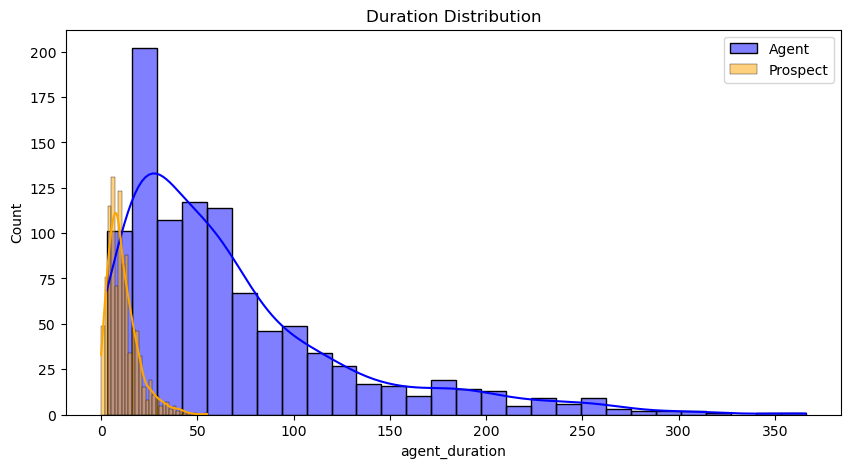

In [191]:
plt.figure(figsize=(10, 5))
snb.histplot(df_sec['agent_duration'], color='blue', label='Agent', kde=True)
snb.histplot(df_sec['prospect_duration'], color='orange', label='Prospect', kde=True)
plt.title("Duration Distribution")
plt.legend()
plt.show()

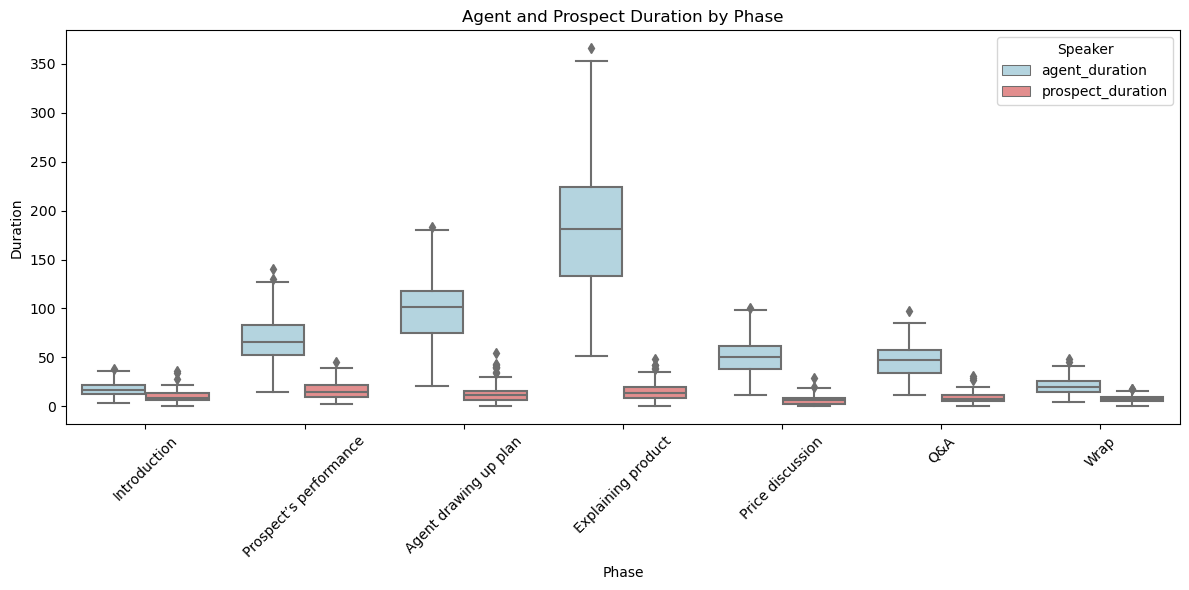

In [192]:
df_melted = df_sec.melt(
    id_vars='phase',
    value_vars=['agent_duration', 'prospect_duration'],
    var_name='speaker',
    value_name='duration'
)

plt.figure(figsize=(12, 6))
snb.boxplot(data=df_melted, x='phase', y='duration', hue='speaker',
            palette={'agent_duration': 'lightblue', 'prospect_duration': 'lightcoral'})

plt.title("Agent and Prospect Duration by Phase")
plt.xticks(rotation=45)
plt.xlabel('Phase')
plt.ylabel('Duration')
plt.legend(title='Speaker')
plt.tight_layout()
plt.show()

C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


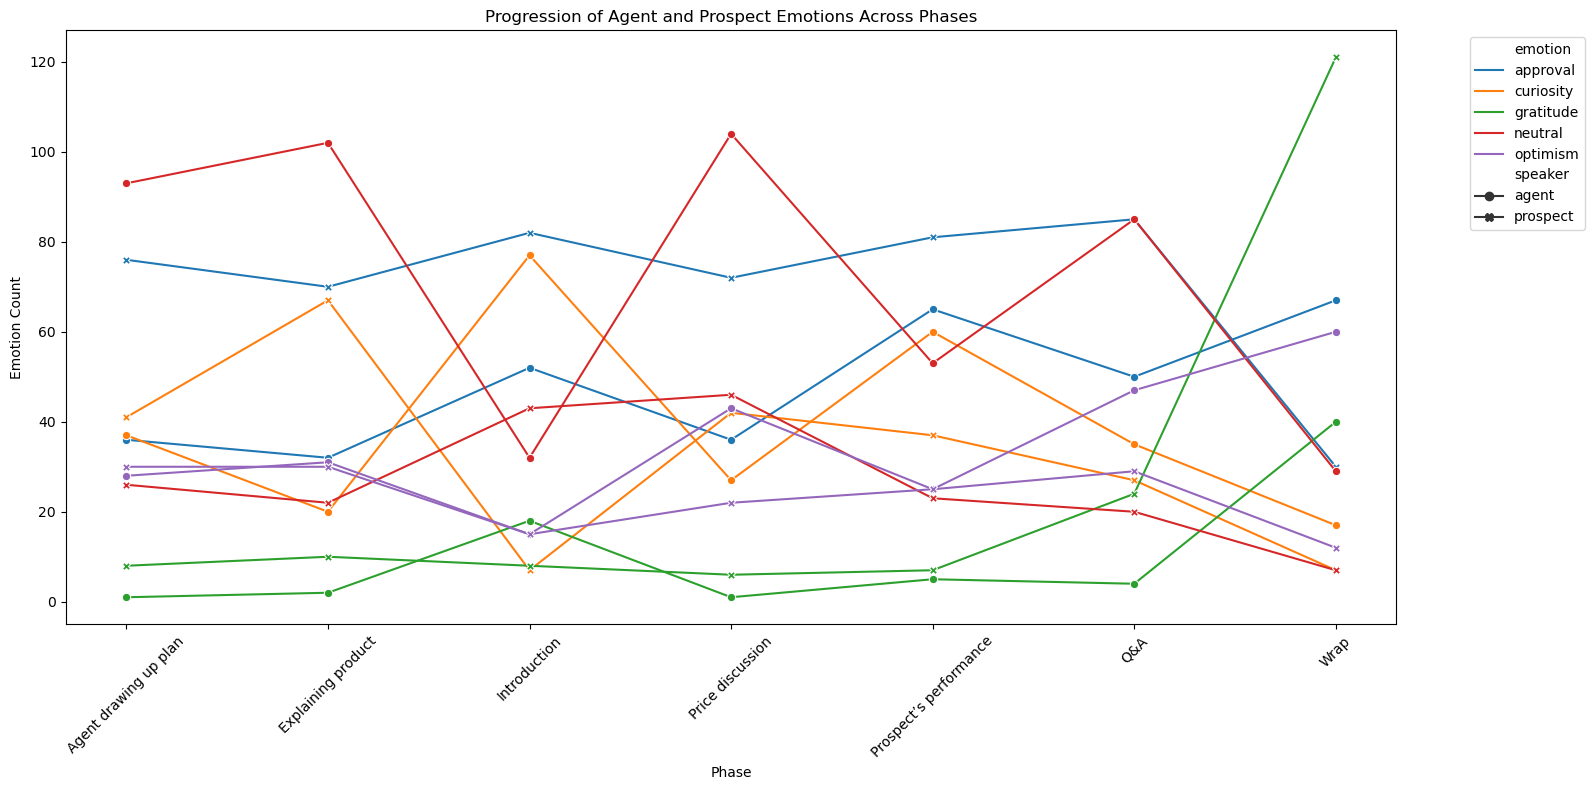

In [193]:
df_sec_mod = df_sec.copy()
df_sec_mod["agent_emotions"] = df_sec_mod["agent_emotions"].fillna("").apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])
df_sec_mod["prospect_emotions"] = df_sec_mod["prospect_emotions"].fillna("").apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])

agent_emotions_long = df_sec_mod.explode("agent_emotions")[["phase", "agent_emotions"]].rename(columns={"agent_emotions": "emotion"})
agent_emotions_long["speaker"] = "agent"

prospect_emotions_long = df_sec_mod.explode("prospect_emotions")[["phase", "prospect_emotions"]].rename(columns={"prospect_emotions": "emotion"})
prospect_emotions_long["speaker"] = "prospect"

emotion_long = pd.concat([agent_emotions_long, prospect_emotions_long], ignore_index=True)

emotion_counts = emotion_long.groupby(["phase", "speaker", "emotion"]).size().reset_index(name="count")

import seaborn as snb
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

top_emotions = (
    emotion_counts.groupby("emotion")["count"].sum().sort_values(ascending=False).head(5).index.tolist()
)
filtered_counts = emotion_counts[emotion_counts["emotion"].isin(top_emotions)]

# Plot
snb.lineplot(
    data=filtered_counts,
    x="phase",
    y="count",
    hue="emotion",
    style="speaker",
    markers=True,
    dashes=False
)

plt.title("Progression of Agent and Prospect Emotions Across Phases")
plt.xlabel("Phase")
plt.ylabel("Emotion Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


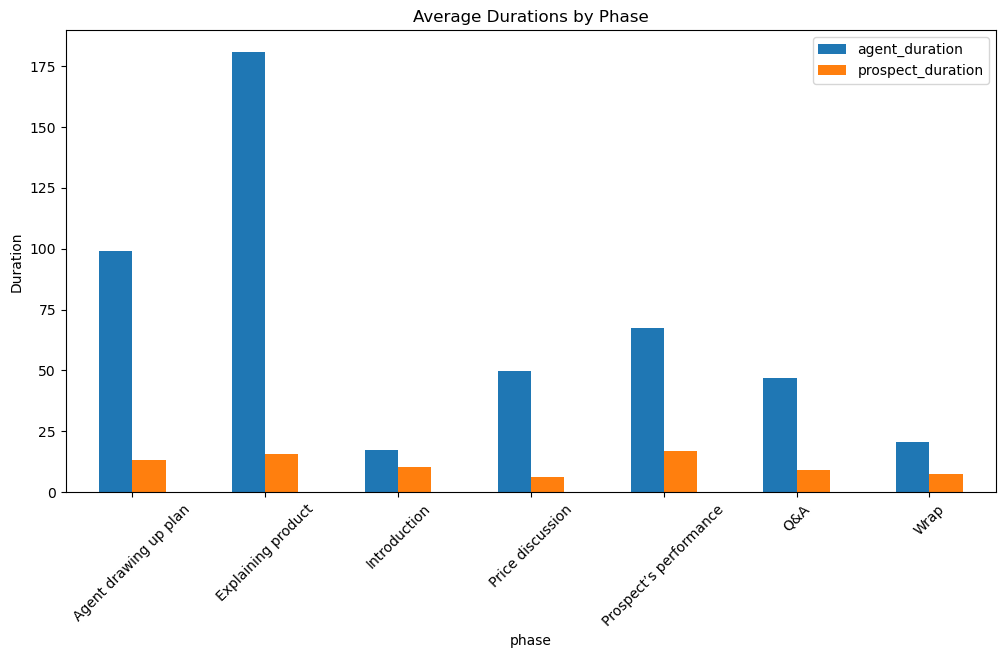

In [194]:
df_grouped = df_sec.groupby('phase')[['agent_duration', 'prospect_duration']].mean().reset_index()
df_grouped.plot(x='phase', kind='bar', stacked=False, figsize=(12, 6))
plt.title("Average Durations by Phase")
plt.xticks(rotation=45)
plt.ylabel("Duration")
plt.show()

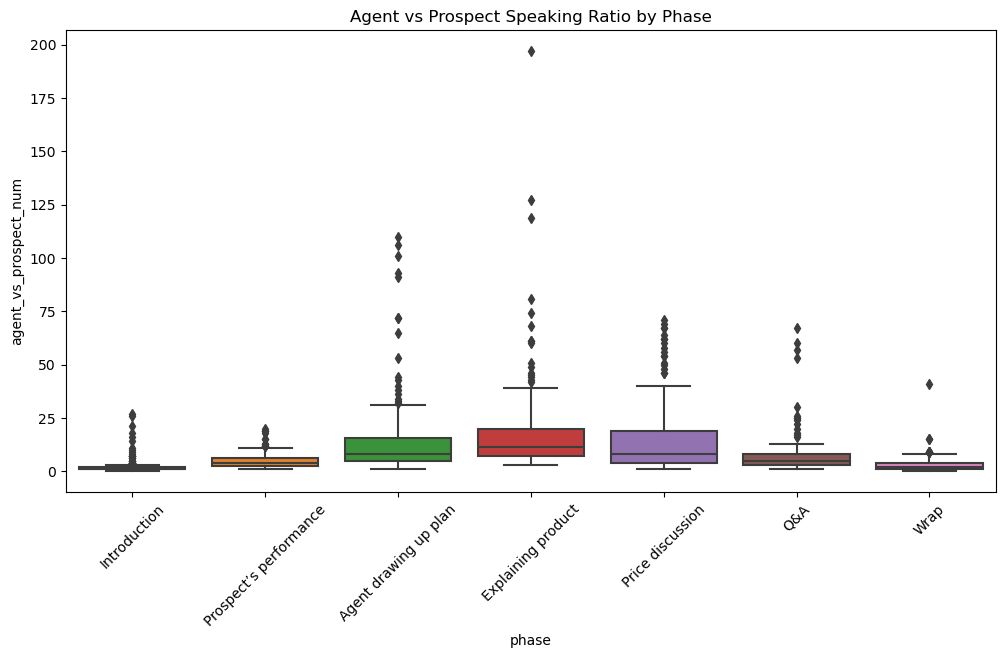

In [195]:
plt.figure(figsize=(12, 6))
snb.boxplot(data=df_sec, x='phase', y='agent_vs_prospect_num')
plt.title("Agent vs Prospect Speaking Ratio by Phase")
plt.xticks(rotation=45)
plt.show()

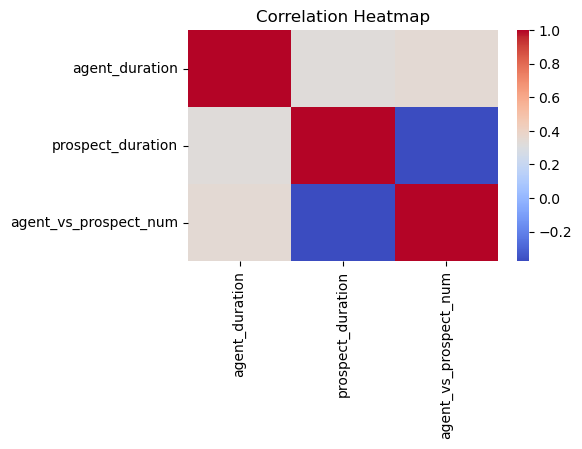

In [196]:
numeric_cols = df_sec.select_dtypes(include=np.number)
plt.figure(figsize=(5, 3))
snb.heatmap(numeric_cols.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

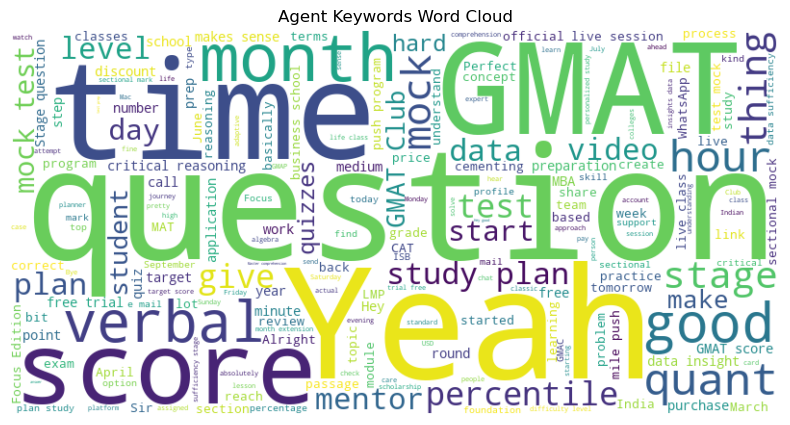

In [197]:
text = " ".join(df_sec['agent_keywords'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Agent Keywords Word Cloud")
plt.show()

### Conversion Analysis

In [198]:
df_conv = pd.read_csv("conversion_likelihood_80.csv")
df_conv.head()

,transcript_id,month,conversion_likelihood,reasoning,key_phases,prospect_keywords,emotions_detected,location,education,organization,date
0,100_20250213,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion,Agent drawing up pla...","Electronics and Communication, engineering in ...","approval,gratitude,optimism,admiration,optimis...",India,"b.tech, engineering","UPSC, GMAT, GP, Indian School of Business, CAT...","2021, 11 months, 7 to 8 months"
1,101_20250212,Feb,0.8,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Price discussion,Price discussion,Age...","engineer by profession, basically an engineer,...","gratitude,optimism,optimism,optimism,realizati...",No Info,"engineering, masters","PMS, GMAC, CFA L1",about 1 1/2 years
2,102_20250212,Feb,0.7,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Prospect’s performance,Agent drawing ...","Yeah, quant, quant part, easy, ma'am, minute, ...","optimism,realization,approval,gratitude,admira...",No Info,No Info,GMAT,515515
3,103_20250212,Feb,0.5,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Prospect’s performance,Agent drawing ...","corporate finance, teaching corporate finance,...","gratitude,optimism,optimism","Milan, Rome, US",No Info,"Business School, GMAT, G Mac, IELTS",1 five days ago
4,104_20250212,Feb,0.6,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","Amruth, Yeah, laptop, business laptop, class, ...","approval,gratitude,gratitude,optimism",No Info,No Info,WhatsApp,No Info


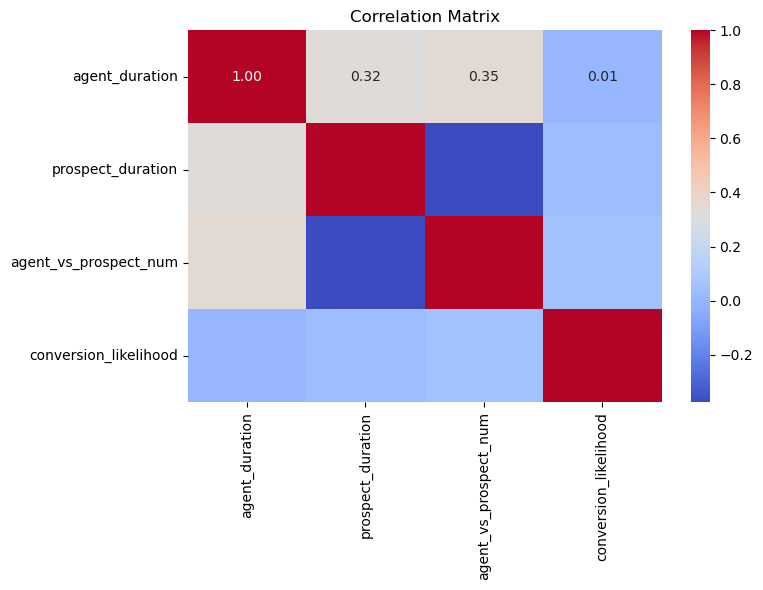

In [199]:
df_corr = pd.merge(df_sec[['transcript_id','agent_duration','prospect_duration','agent_vs_prospect_num']],
                   df_conv[['transcript_id','conversion_likelihood']], on='transcript_id', how='inner')
df_corr = df_corr.drop(['transcript_id'], axis=1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
snb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [200]:
correlation_matrix

,agent_duration,prospect_duration,agent_vs_prospect_num,conversion_likelihood
agent_duration,1.000000,0.324295,0.346186,0.005258
prospect_duration,0.324295,1.000000,-0.375797,0.029746
agent_vs_prospect_num,0.346186,-0.375797,1.000000,0.051533
conversion_likelihood,0.005258,0.029746,0.051533,1.000000


C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


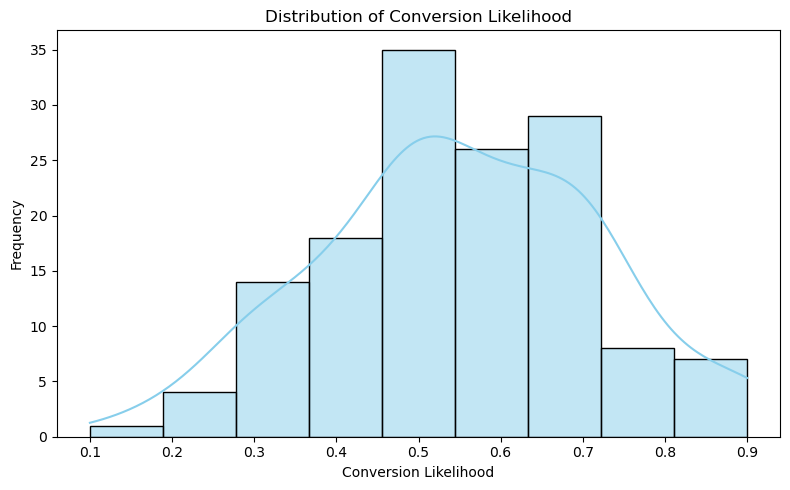

In [201]:
plt.figure(figsize=(8, 5))
snb.histplot(df_conv["conversion_likelihood"], kde=True, color="skyblue")
plt.title("Distribution of Conversion Likelihood")
plt.xlabel("Conversion Likelihood")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

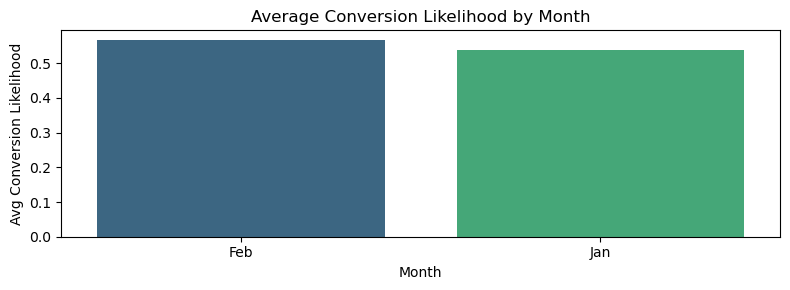

In [202]:
monthly_avg = df_conv.groupby("month")["conversion_likelihood"].mean().sort_index()

plt.figure(figsize=(8, 3))
snb.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")

plt.title("Average Conversion Likelihood by Month")
plt.xlabel("Month")
plt.ylabel("Avg Conversion Likelihood")
plt.tight_layout()
plt.show()

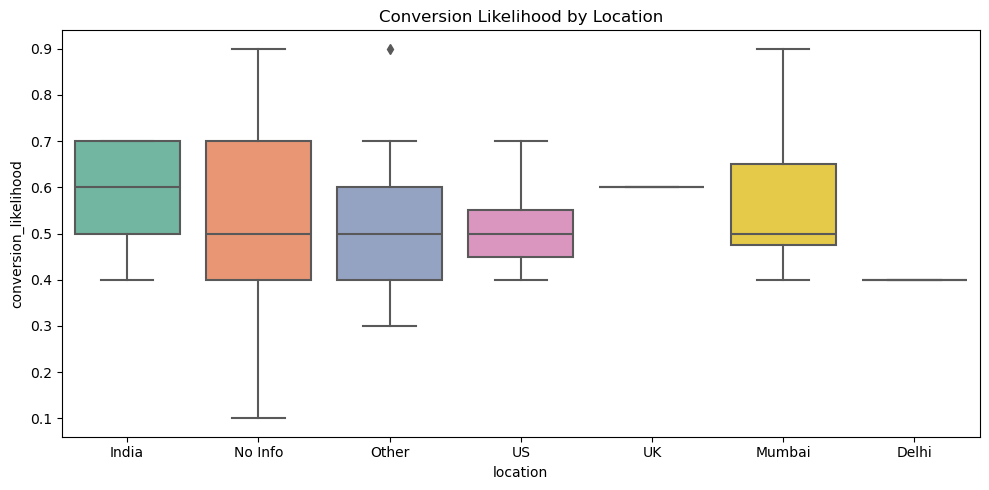

In [203]:
df_location = df_conv[["transcript_id", "location", "conversion_likelihood"]].copy()
df_location["location"] = df_location["location"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_location = df_location.explode("location")

location_counts = df_location['location'].value_counts()
common_locations = location_counts[location_counts > 1].index  # threshold can be adjusted

df_location['location'] = df_location['location'].apply(
    lambda x: x if x in common_locations else 'Other'
)

plt.figure(figsize=(10, 5))
snb.boxplot(data=df_location, x="location", y="conversion_likelihood", palette="Set2")
plt.title("Conversion Likelihood by Location")
plt.tight_layout()
plt.show()

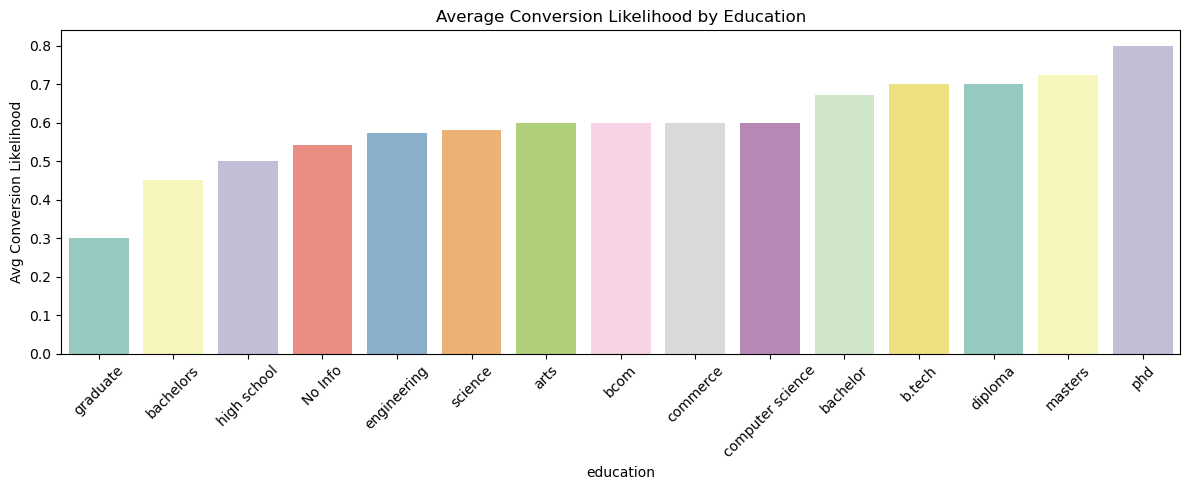

In [204]:
df_education = df_conv[["transcript_id", "education", "conversion_likelihood"]].copy()
df_education["education"] = df_education["education"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_education = df_education.explode("education")

plt.figure(figsize=(12, 5))
education_group = df_education.groupby("education")["conversion_likelihood"].mean().sort_values()
snb.barplot(x=education_group.index, y=education_group.values, palette="Set3")
plt.title("Average Conversion Likelihood by Education")
plt.ylabel("Avg Conversion Likelihood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

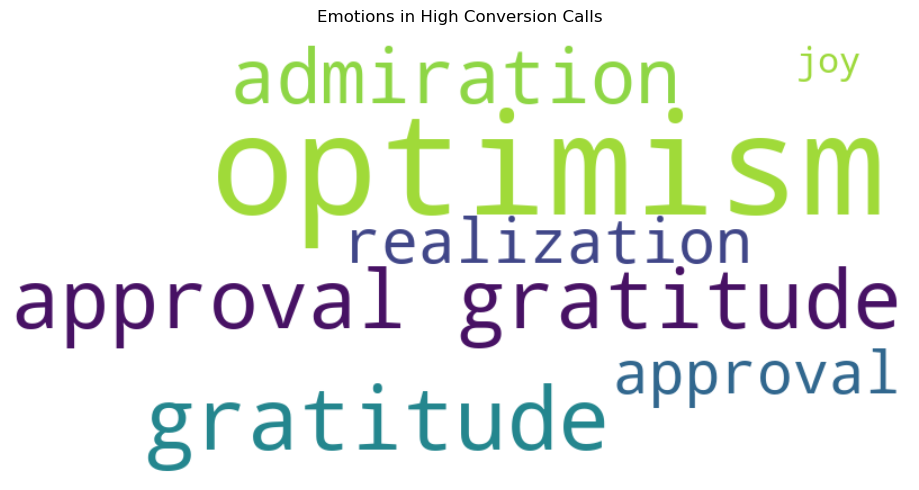

In [208]:
high_likelihood_emotions = df_conv[df_conv["conversion_likelihood"] > 0.55]["emotions_detected"].explode()
text = " ".join(high_likelihood_emotions.dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Emotions in High Conversion Calls")
plt.tight_layout()
plt.show()

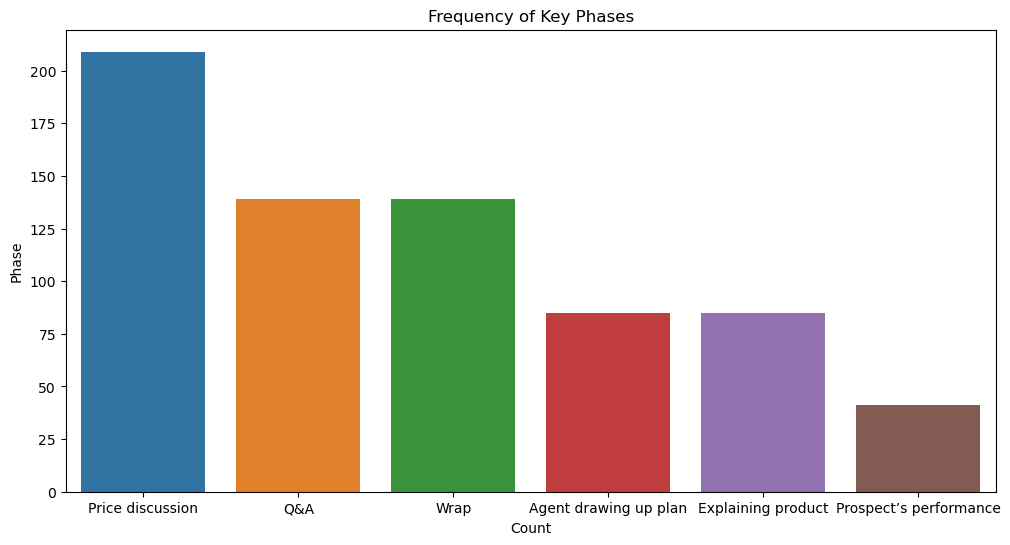

In [206]:
df_key_phases = df_conv[["transcript_id", "key_phases", "conversion_likelihood"]].copy()
df_key_phases["key_phases"] = df_key_phases["key_phases"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_key_phases = df_key_phases.explode("key_phases")

plt.figure(figsize=(12, 6))
snb.countplot(data=df_key_phases, x="key_phases", order=df_key_phases["key_phases"].value_counts().index)
plt.title("Frequency of Key Phases")
plt.xlabel("Count")
plt.ylabel("Phase")
plt.show()

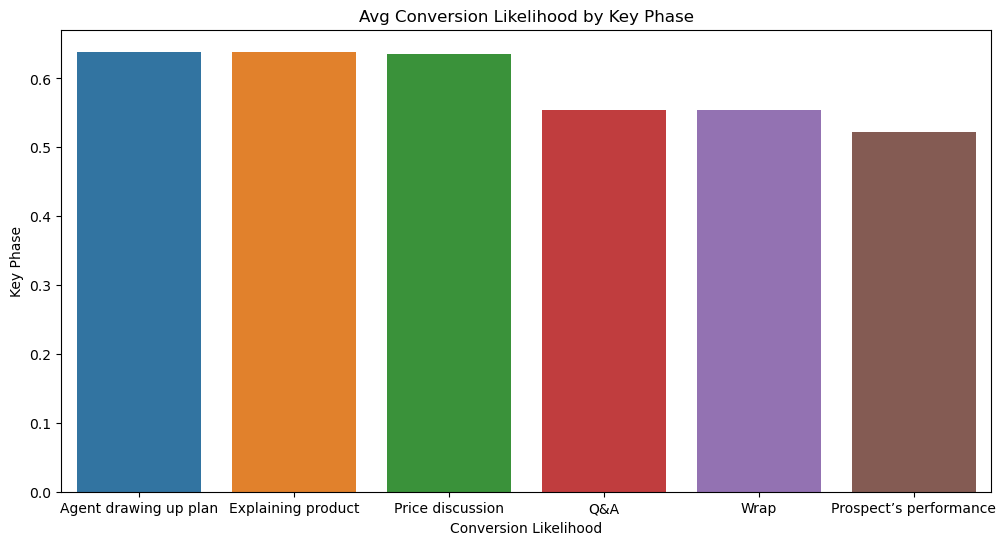

In [207]:
mean_likelihood = df_key_phases.groupby("key_phases")["conversion_likelihood"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
snb.barplot(y=mean_likelihood.values, x=mean_likelihood.index)
plt.title("Avg Conversion Likelihood by Key Phase")
plt.xlabel("Conversion Likelihood")
plt.ylabel("Key Phase")
plt.show()

## Statistical Analysis

import pandas as pd
from scipy.stats import ttest_ind, f_oneway, pointbiserialr
import numpy as np

# Simulate your dataset (replace with actual data loading)
np.random.seed(42)
transcript_ids = [f"T{i:03d}" for i in range(1, 101)]
conversion_likelihood = np.random.rand(100) * 100

# Hypothesis scores from your logic
h1_scores = np.random.choice([0, 0.5, 1], size=100, p=[0.3, 0.4, 0.3])
h2_scores = np.random.choice([0, 1], size=100, p=[0.4, 0.6])
h3_scores = np.random.choice([0, 0.5, 1], size=100, p=[0.4, 0.4, 0.2])
h4_scores = np.random.choice([0, 1], size=100, p=[0.3, 0.7])
h5_flags = np.random.choice([0, 1], size=100, p=[0.5, 0.5])

# Create DataFrame
df_hyp = pd.DataFrame({
    'transcript_id': transcript_ids,
    'conversion_likelihood': conversion_likelihood,
    'h1_score': h1_scores,
    'h2_score': h2_scores,
    'h3_score': h3_scores,
    'h4_score': h4_scores,
    'h5_flag': h5_flags
})

# Hypothesis 1: ANOVA
h1_anova = f_oneway(
    df_hyp[df_hyp['h1_score'] == 0]['conversion_likelihood'],
    df_hyp[df_hyp['h1_score'] == 0.5]['conversion_likelihood'],
    df_hyp[df_hyp['h1_score'] == 1]['conversion_likelihood']
)

# Hypothesis 2: T-test
h2_ttest = ttest_ind(
    df_hyp[df_hyp['h2_score'] == 1]['conversion_likelihood'],
    df_hyp[df_hyp['h2_score'] == 0]['conversion_likelihood'],
    equal_var=False
)

# Hypothesis 3: ANOVA
h3_anova = f_oneway(
    df_hyp[df_hyp['h3_score'] == 0]['conversion_likelihood'],
    df_hyp[df_hyp['h3_score'] == 0.5]['conversion_likelihood'],
    df_hyp[df_hyp['h3_score'] == 1]['conversion_likelihood']
)

# Hypothesis 4: T-test
h4_ttest = ttest_ind(
    df_hyp[df_hyp['h4_score'] == 1]['conversion_likelihood'],
    df_hyp[df_hyp['h4_score'] == 0]['conversion_likelihood'],
    equal_var=False
)

# Hypothesis 5: Point Biserial Correlation
h5_corr = pointbiserialr(df_hyp['h5_flag'], df_hyp['conversion_likelihood'])

# Results
results = {
    "H1_ANOVA": {"statistic": h1_anova.statistic, "p_value": h1_anova.pvalue},
    "H2_T-test": {"statistic": h2_ttest.statistic, "p_value": h2_ttest.pvalue},
    "H3_ANOVA": {"statistic": h3_anova.statistic, "p_value": h3_anova.pvalue},
    "H4_T-test": {"statistic": h4_ttest.statistic, "p_value": h4_ttest.pvalue},
    "H5_Correlation": {"correlation": h5_corr.correlation, "p_value": h5_corr.pvalue}
}

print(results)
